# Basic Mathmatics by Python 6-7
KGSOC「数理・データサイエンスのための基礎数学」参考資料

石田　淳 (aishida@kwansei.ac.jp)

## 6章　確率(1)

Pythonでコイン投げ（ベルヌイ試行）を行ってみよう．ここでは`random`ライブラリを用いる．

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

0か1をランダムに出す関数をコイン投げ代わりにする．

In [2]:
random.randint(0, 1)
# random.randint(1, 6) # サイコロ

0

10回投げて平均を取る（成功割合）．

In [3]:
coins = []

for j in range(10):
    coins.append(random.randint(0, 1))
print("coins = ", coins)
mean = np.mean(coins)
# numpyを使わない場合：sum(coins)/len(coins)
print("mean = ", mean)

coins =  [0, 1, 0, 1, 0, 0, 1, 0, 0, 1]
mean =  0.4


10回投げて平均を取る操作を1000回行って平均のヒストグラムをとる．

mean of means = 0.4865
std of means = 0.15481521243082022


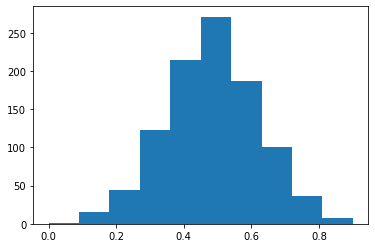

In [4]:
coins = []
means = []

for i in range(1000):
    for j in range(10):
        coins.append(random.randint(0, 1))
    mean = np.mean(coins)
    means.append(mean)
    coins = []

print("mean of means =", np.mean(means))
print("std of means =", np.std(means))
plt.hist(means);

コイン投げ回数を1回ずつ増やしていってそのつど平均を取る．回数が多くなるにつれて，0.5に収束していっているようだ．

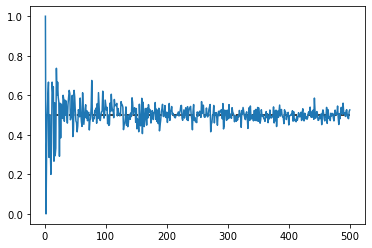

In [5]:
coins = []
mean_series = []
series = range(1, 501)

for i in series:
    for j in range(i):
        coins.append(random.randint(0, 1))
    mean = np.mean(coins)
    mean_series.append(mean)
    coins = []

plt.plot(series, mean_series)
plt.hlines(.5, series[0], series[-1], 'k', linestyles='dashed')
plt.show()

## 7章　確率(2)

二項分布を観察する．`scipy.stats`パッケージを用いる．

In [6]:
from scipy.stats import binom
import matplotlib.pyplot as plt

In [7]:
n, p = 10, 0.5

x = range(0, n + 1)
prob = binom.pmf(x, n, p)

print(dict(zip(x, [round(p,2) for p in prob])))
print("sum of prob", round(prob.sum(), 2))

{0: 0.0, 1: 0.01, 2: 0.04, 3: 0.12, 4: 0.21, 5: 0.25, 6: 0.21, 7: 0.12, 8: 0.04, 9: 0.01, 10: 0.0}
sum of prob 1.0


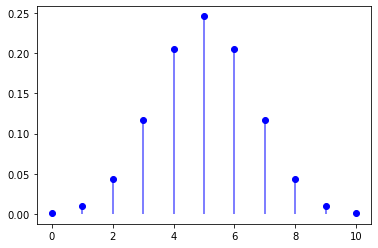

In [8]:
fig, ax = plt.subplots(1, 1)
ax.plot(x, binom.pmf(x, n, p), 'bo')
ax.vlines(x, 0, binom.pmf(x, n, p), colors='b', lw=2, alpha=0.5)
plt.show()

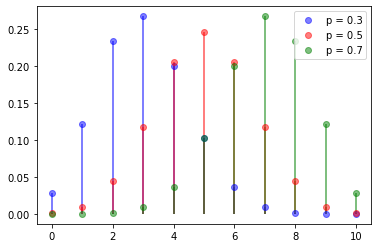

In [9]:
fig, ax = plt.subplots(1, 1)
ax.plot(x, binom.pmf(x, 10, 0.3), 'bo', alpha=0.5)
ax.vlines(x, 0, binom.pmf(x, 10, 0.3), colors='b', lw=2, alpha=0.5)
ax.plot(x, binom.pmf(x, 10, 0.5), 'ro', alpha=0.5)
ax.vlines(x, 0, binom.pmf(x, 10, 0.5), colors='r', lw=2, alpha=0.5)
ax.plot(x, binom.pmf(x, 10, 0.7), 'go', alpha=0.5)
ax.vlines(x, 0, binom.pmf(x, 10, 0.7), colors='g', lw=2, alpha=0.5)
ax.legend(["p = 0.3", "p = 0.5", "p = 0.7"], loc="upper right")
plt.show()

二項分布にしたがう乱数を発生させる．

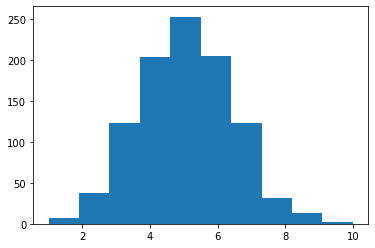

In [10]:
freq = binom.rvs(n, p, size=1000, random_state=8931)
plt.hist(freq);

`numpy`の二項分布関数を使って同様のことをする．

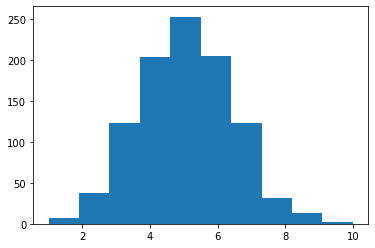

In [11]:
np.random.seed(8931)
freq_np = np.random.binomial(n, p, 1000)
plt.hist(freq_np);